<a href="https://colab.research.google.com/github/restrepotorres/exploracion.ipynb/blob/master/01_exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01.01 - PROYECTO KAGGLE

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

## download data directly from Kaggle

- create a file `kaggle.json` with your authentication token (in kaggle $\to$ click user icon on top-right $\to$ settings $\to$ API create new token)
- upload it to this notebook workspace
- run the following cell

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

udea-ai4eng-20242.zip: Skipping, found more recently modified local copy (use --force to force download)


## unzip and inspect data

In [ ]:
!unzip udea*.zip > /dev/null

## load `train.csv` data with pandas



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
train.columns

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO',
       'RENDIMIENTO_GLOBAL'],
      dtype='object')

In [ ]:
train.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


In [ ]:
target = 'RENDIMIENTO_GLOBAL'
rmap = {'alto': 3, 'bajo':0, 'medio-bajo':1, 'medio-alto':2}
train[target] = train[target].map(rmap)

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,2
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,0
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,0
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,3
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,2
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,0
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,1
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,Primaria completa,Si,0


In [ ]:
ax = plt.figure(figsize=(30,15)).add_subplot(111)
ax.imshow(train.isna().values.T)
ax.set_aspect(12)
plt.yticks(range(train.shape[1]), train.columns);

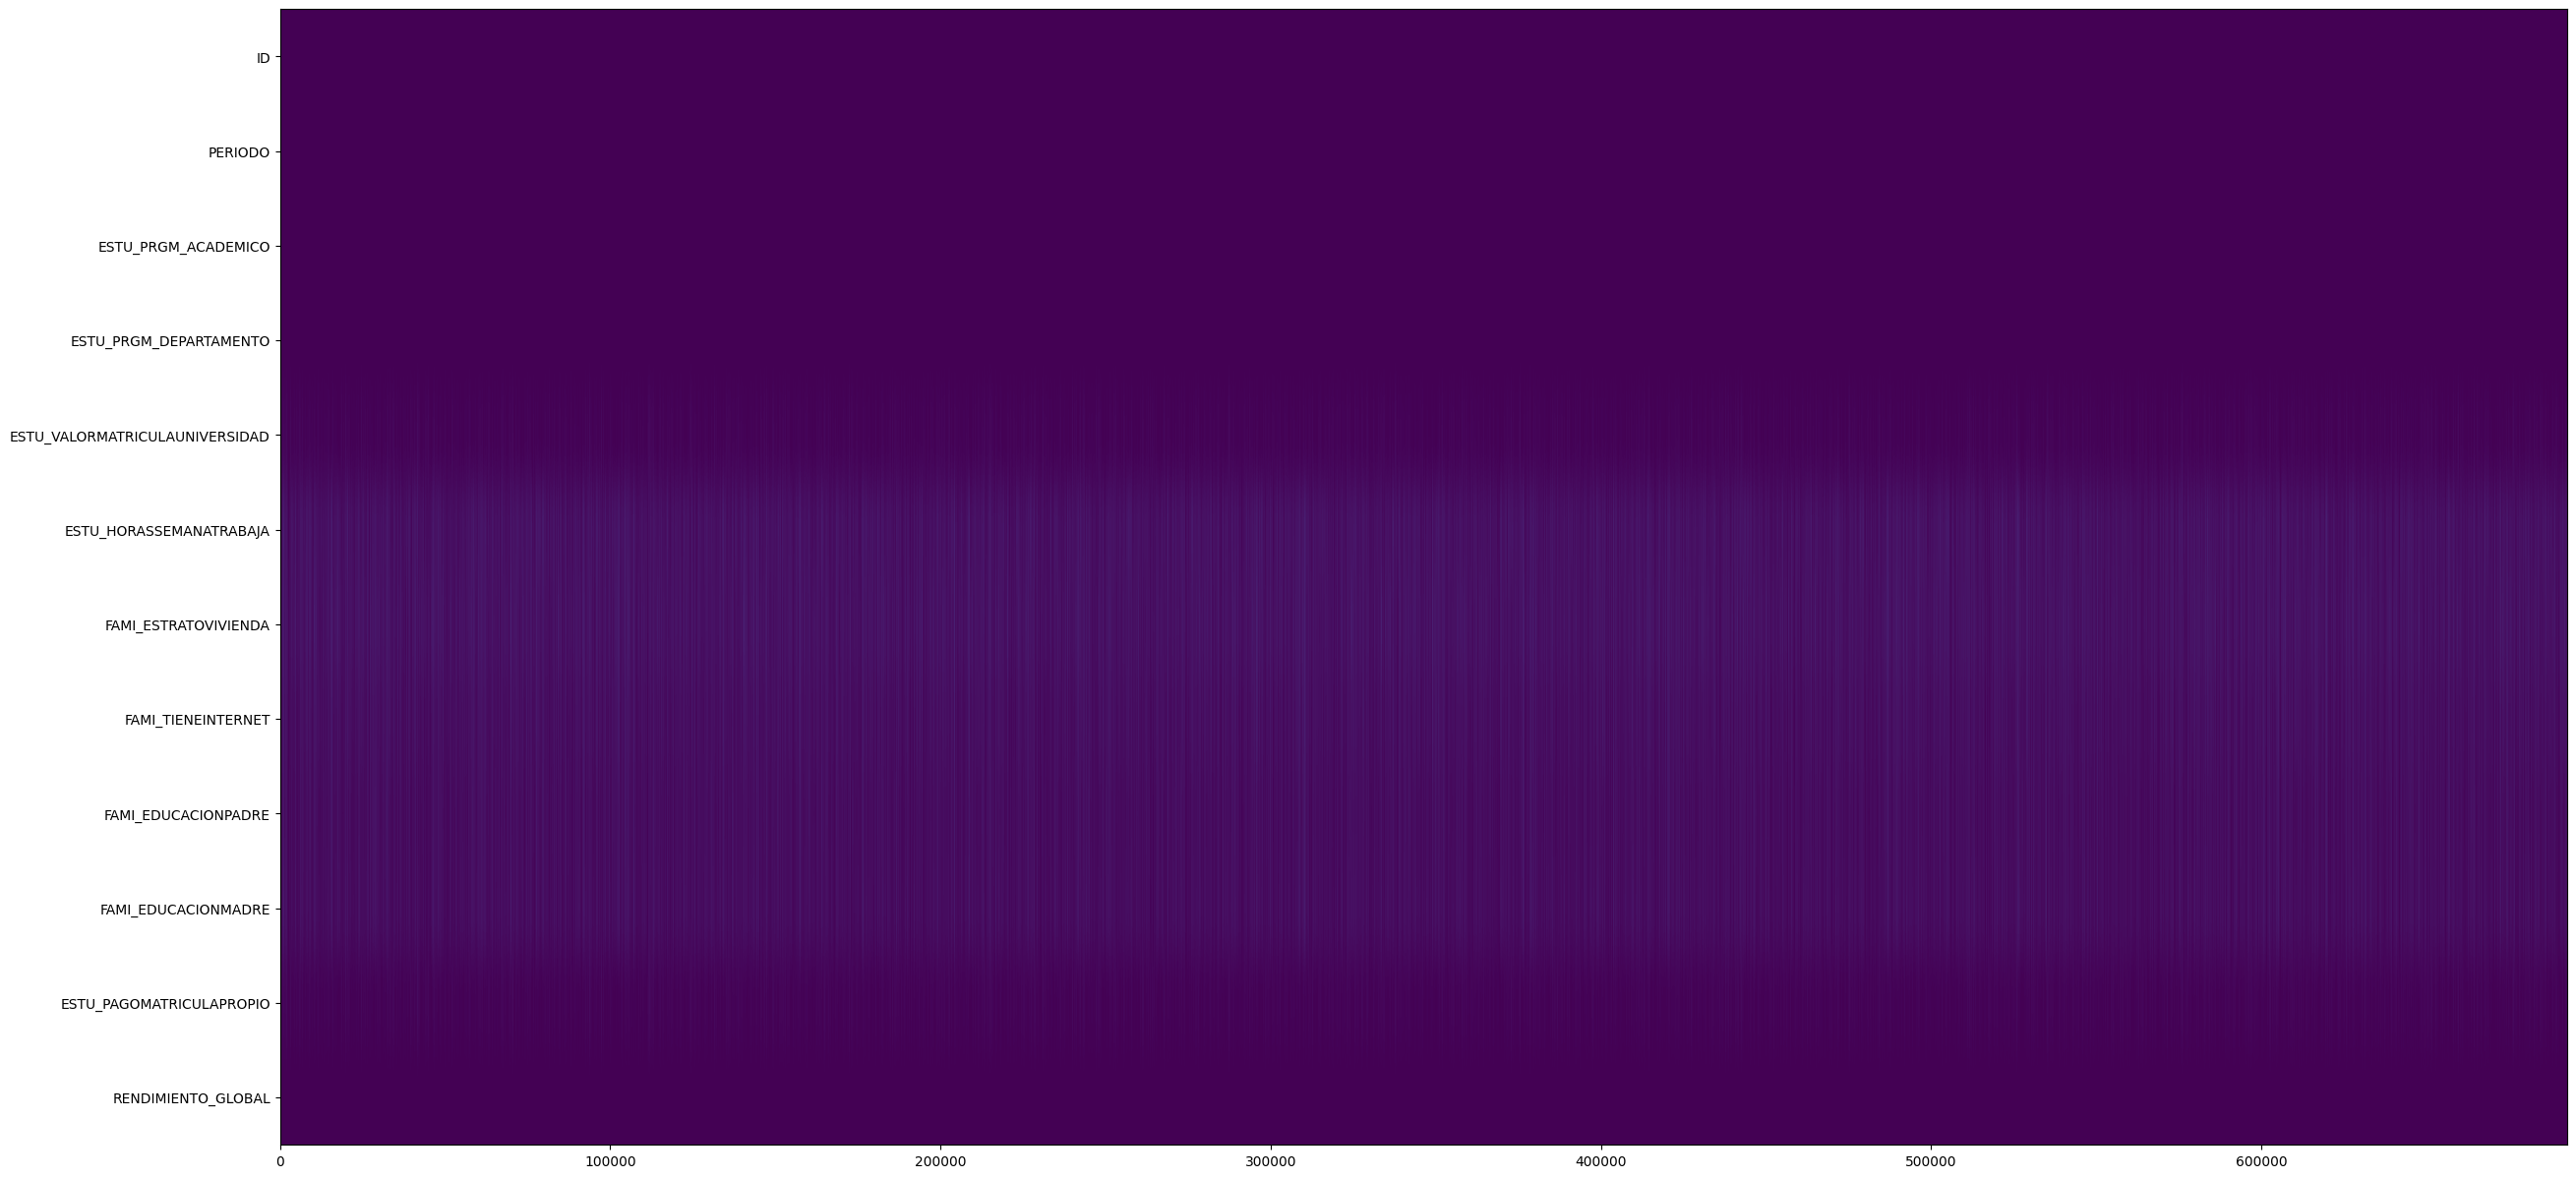

In [ ]:
ax = plt.figure(figsize=(30,15)).add_subplot(111)
ax.imshow(train.isna().values.T, aspect='auto')
plt.yticks(range(train.shape[1]), train.columns)
plt.show()

In [ ]:
c="ESTU_PRGM_DEPARTAMENTO"
train[c].value_counts()

,count
ESTU_PRGM_DEPARTAMENTO,
BOGOTÁ,282159
ANTIOQUIA,83607
VALLE,44588
ATLANTICO,41020
SANTANDER,28828
NORTE SANTANDER,22588
BOLIVAR,20629
BOYACA,14048
CUNDINAMARCA,14018


In [ ]:
y_col = 'RENDIMIENTO_GLOBAL'

rmap = {'alto': 3, 'bajo':0, 'medio-bajo':1, 'medio-alto':2}
train[y_col] = [rmap[i] for i in z[y_col]]
train.head()

In [ ]:
categorical_cols = [col for col in train.columns if col not in  train._get_numeric_data()]
del categorical_cols[0]
categorical_cols
len(categorical_cols)

8

In [ ]:
print(0%4)

0


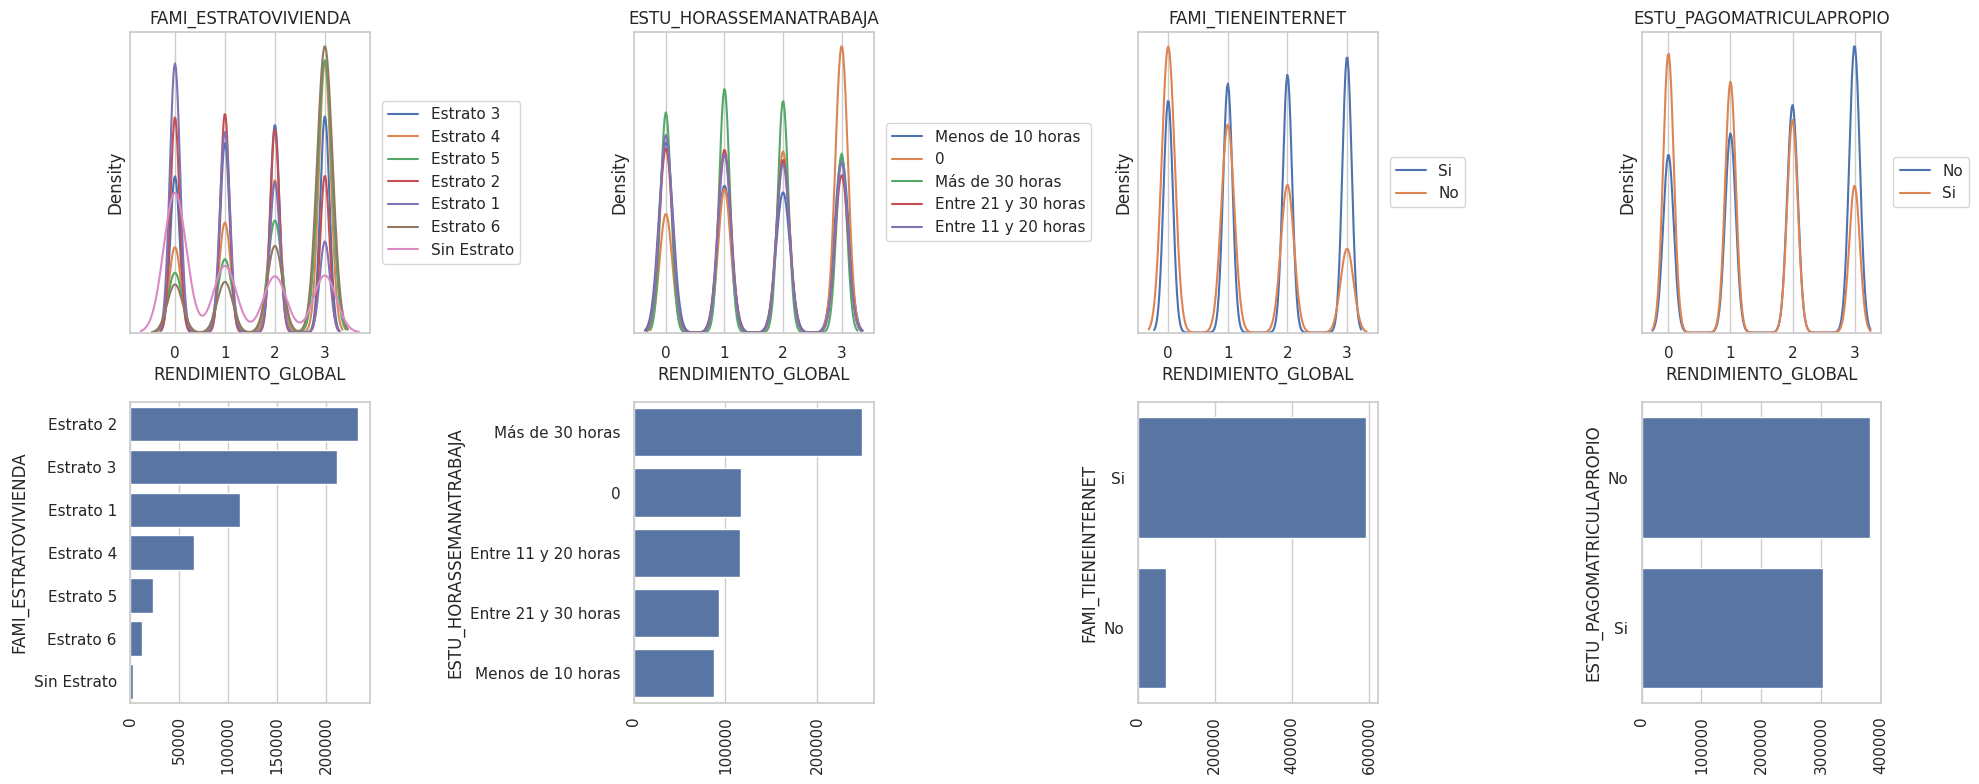

In [ ]:
plt.figure(figsize=(20,8))

# Ciclo para generar los gráficos
for i, c in enumerate(["FAMI_ESTRATOVIVIENDA", 'ESTU_HORASSEMANATRABAJA', 'FAMI_TIENEINTERNET', 'ESTU_PAGOMATRICULAPROPIO']):
    plt.subplot(2, 4, i + 1)
    k = train[[c, "RENDIMIENTO_GLOBAL"]].dropna()

    # Gráfico KDE para RENDIMIENTO_GLOBAL
    for v in train[c].dropna().unique():
        sns.kdeplot(k.RENDIMIENTO_GLOBAL[k[c] == v], label=v)

    plt.title(c)
    plt.yticks([])

    # Posicionar la leyenda fuera del gráfico, a la derecha
    plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0.)

    # Gráfico de barras para el conteo de categorías
    plt.subplot(2, 4, i + 5)
    vc = k[c].value_counts()
    sns.barplot(x=vc.values, y=vc.index, orient='h')
    plt.xticks(rotation="vertical")

plt.tight_layout()
plt.show()

In [ ]:
categorical_cols

['ESTU_PRGM_DEPARTAMENTO',
 'ESTU_VALORMATRICULAUNIVERSIDAD',
 'ESTU_HORASSEMANATRABAJA',
 'FAMI_ESTRATOVIVIENDA',
 'FAMI_TIENEINTERNET',
 'FAMI_EDUCACIONPADRE',
 'FAMI_EDUCACIONMADRE',
 'ESTU_PAGOMATRICULAPROPIO']

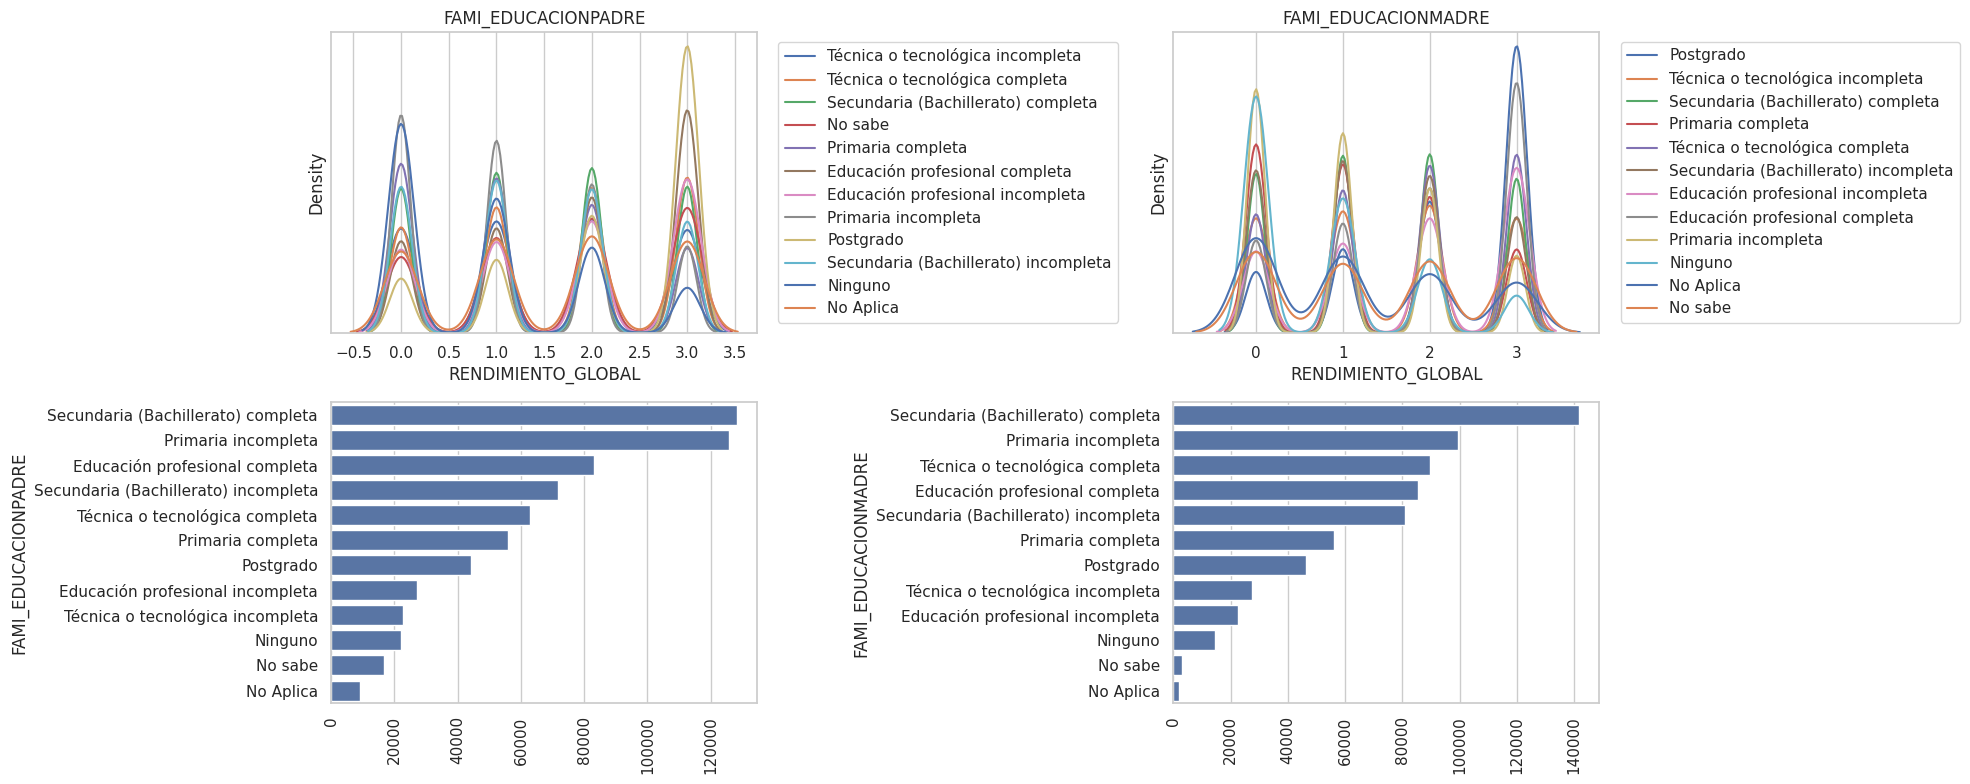

In [ ]:

plt.figure(figsize=(20,8))
for i, c in enumerate(['FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE']):
    plt.subplot(2, 2, i + 1)
    k = train[[c, "RENDIMIENTO_GLOBAL"]].dropna()

    # Gráfico KDE para RENDIMIENTO_GLOBAL
    for v in train[c].dropna().unique():
        sns.kdeplot(k.RENDIMIENTO_GLOBAL[k[c] == v], label=v)

    plt.title(c)
    plt.yticks([])

    # Posicionar la leyenda fuera del gráfico, a la derecha
    plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0.)

    # Gráfico de barras para el conteo de categorías
    plt.subplot(2, 2, i + 3)
    vc = k[c].value_counts()
    sns.barplot(x=vc.values, y=vc.index, orient='h')
    plt.xticks(rotation="vertical")

plt.tight_layout()
plt.show()

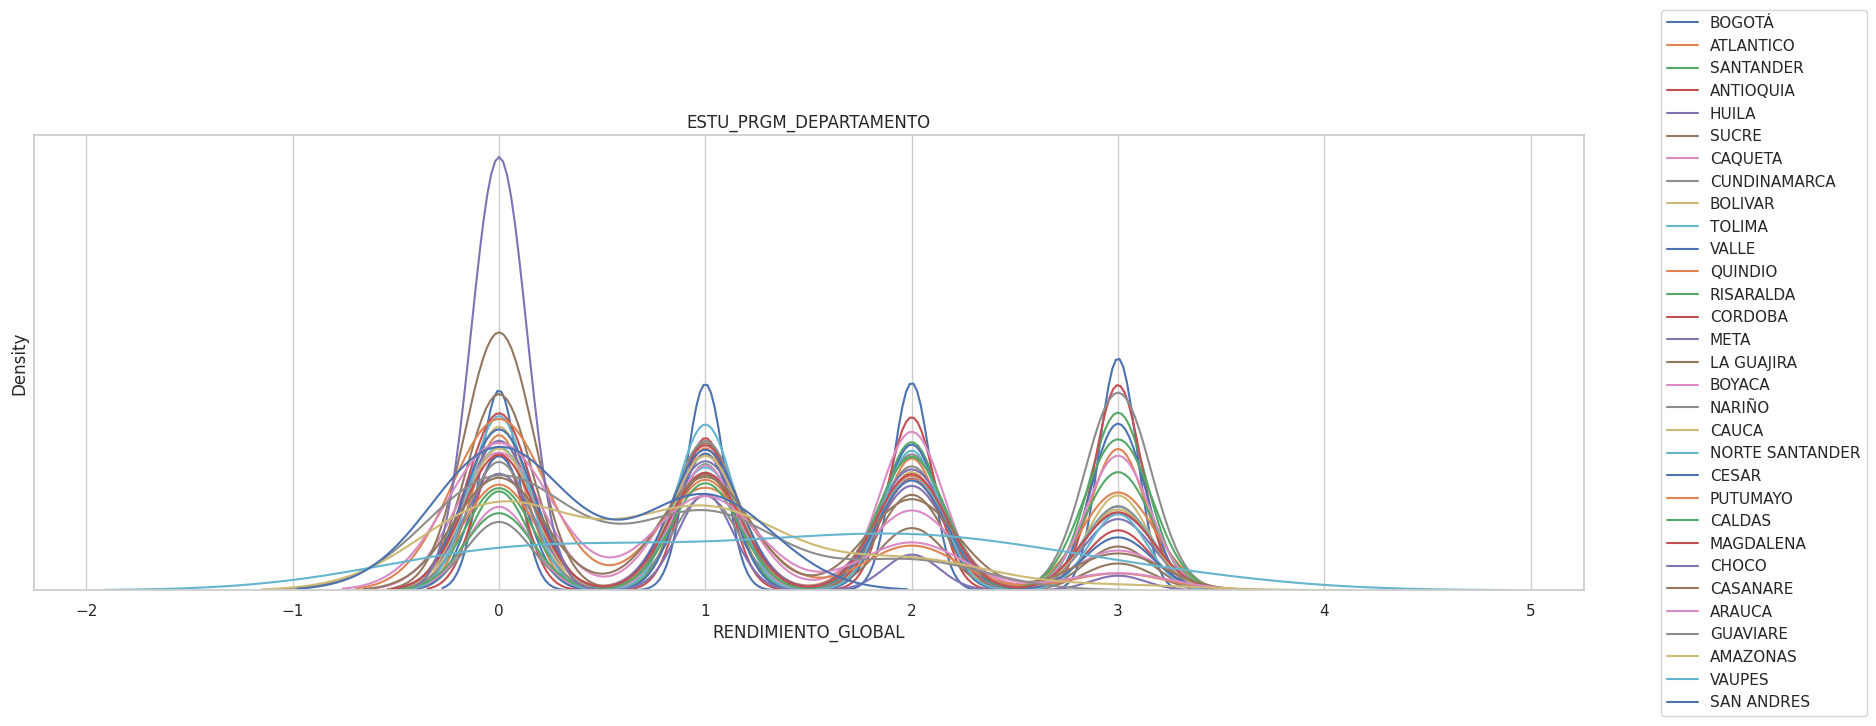

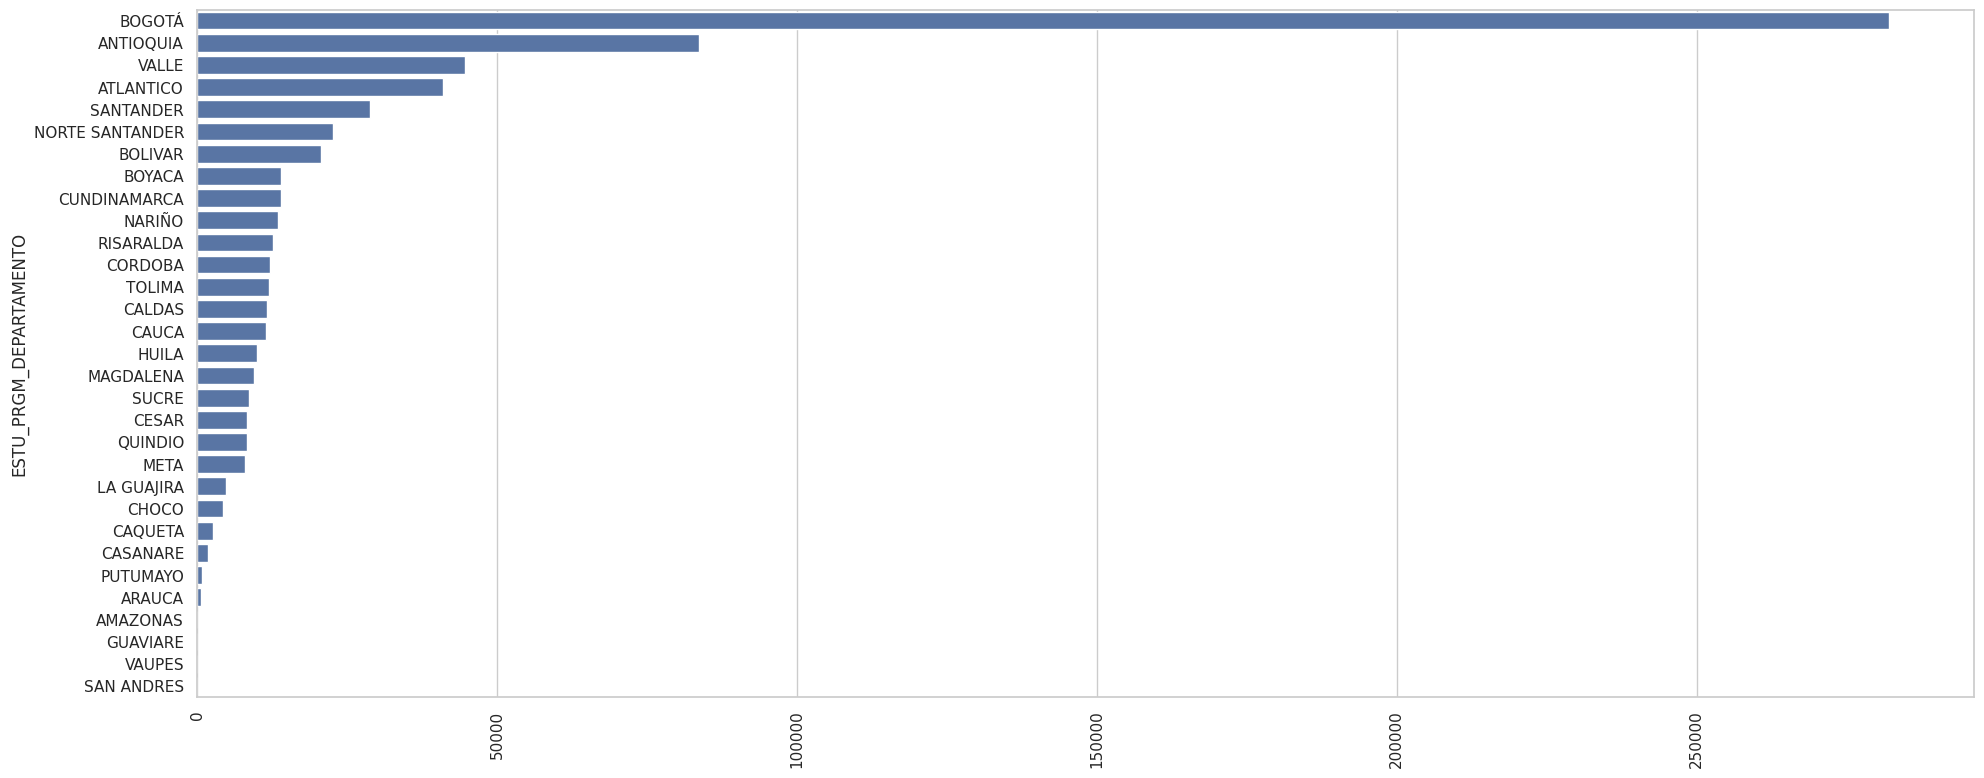

In [ ]:
for i, c in enumerate(['ESTU_PRGM_DEPARTAMENTO']):
    plt.figure(figsize=(20,13))
    plt.subplot(2, 1, 1)
    k = train[[c, "RENDIMIENTO_GLOBAL"]].dropna()

    # Gráfico KDE para RENDIMIENTO_GLOBAL
    for v in train[c].dropna().unique():
        sns.kdeplot(k.RENDIMIENTO_GLOBAL[k[c] == v], label=v)

    plt.title(c)
    plt.yticks([])

    # Posicionar la leyenda fuera del gráfico, a la derecha
    plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0.)

    # Gráfico de barras para el conteo de categorías
    plt.figure(figsize=(20,15))
    plt.subplot(2, 1, 2)
    vc = k[c].value_counts()
    sns.barplot(x=vc.values, y=vc.index, orient='h')
    plt.xticks(rotation="vertical")

plt.tight_layout()
plt.show()

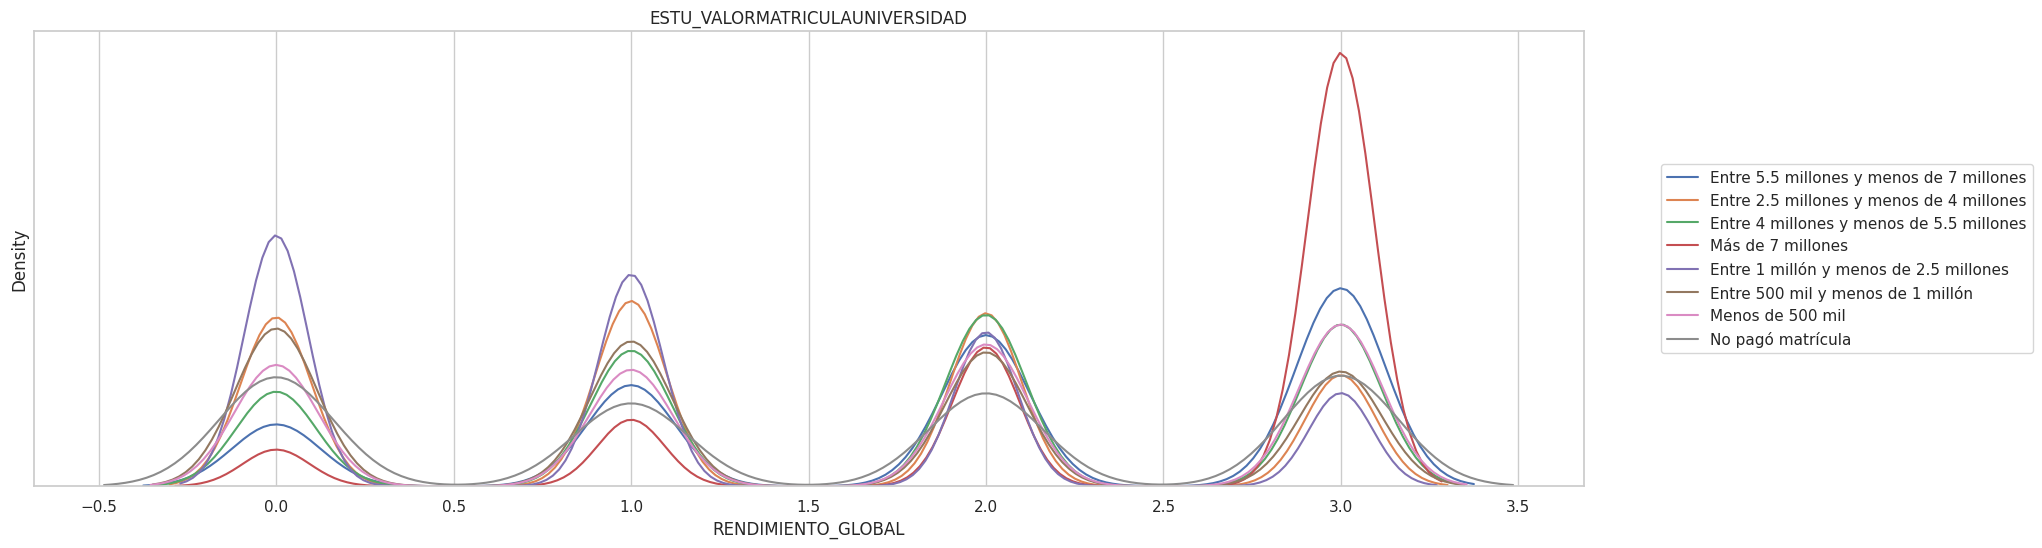

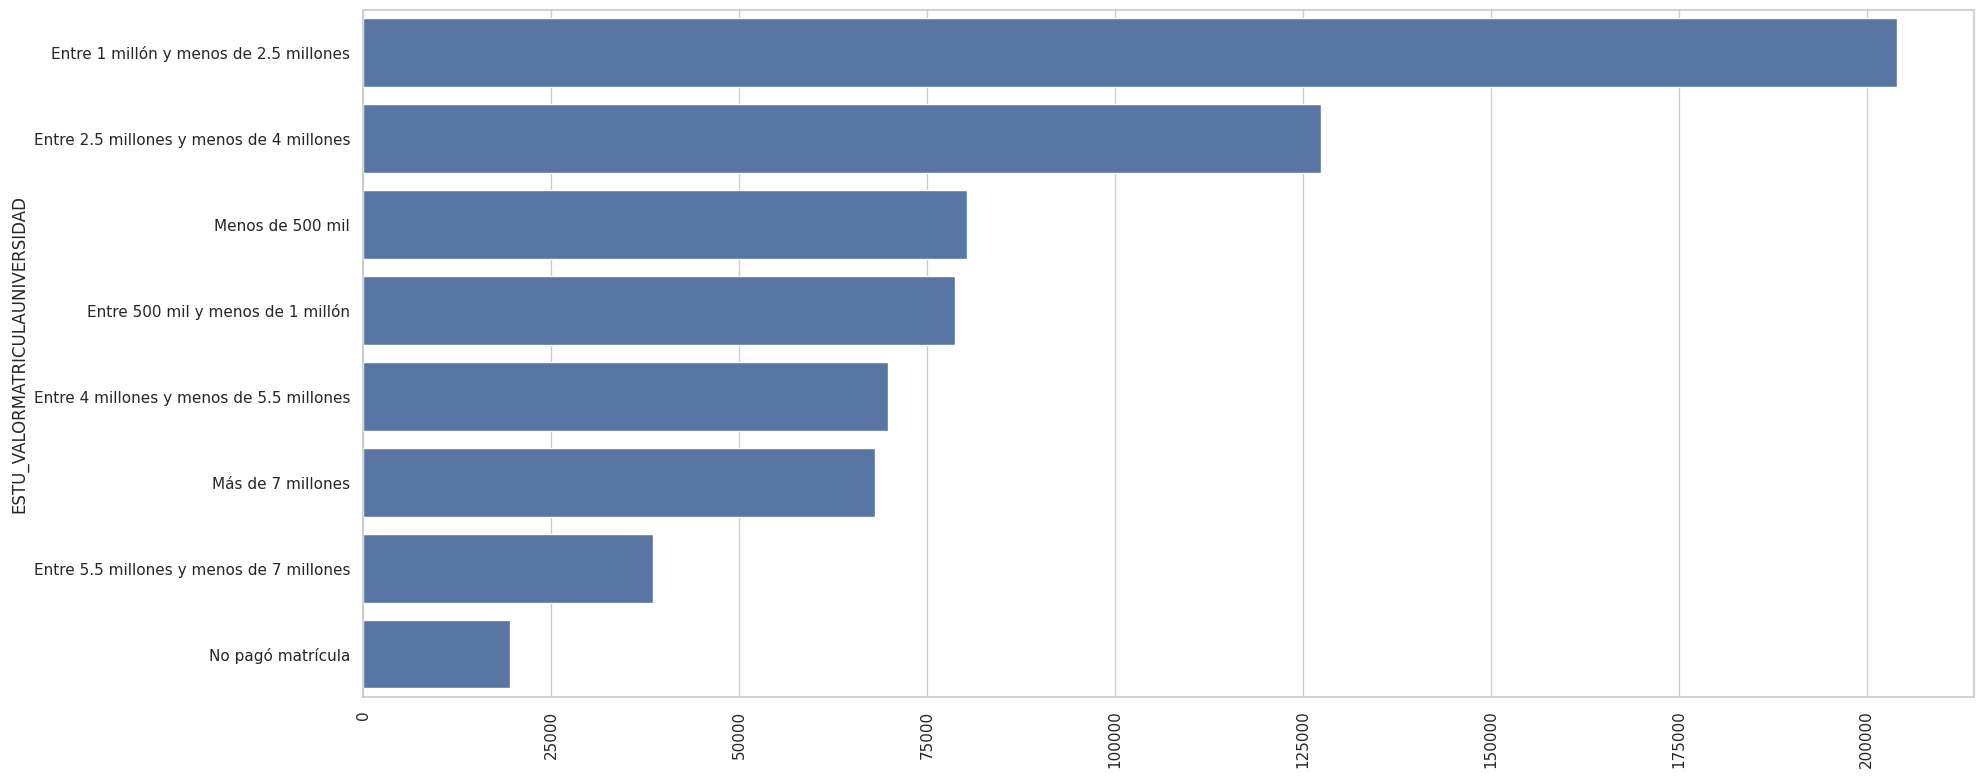

In [ ]:
for i, c in enumerate(['ESTU_VALORMATRICULAUNIVERSIDAD']):
    plt.figure(figsize=(20,13))
    plt.subplot(2, 1, 1)
    k = train[[c, "RENDIMIENTO_GLOBAL"]].dropna()

    # Gráfico KDE para RENDIMIENTO_GLOBAL
    for v in train[c].dropna().unique():
        sns.kdeplot(k.RENDIMIENTO_GLOBAL[k[c] == v], label=v)

    plt.title(c)
    plt.yticks([])

    # Posicionar la leyenda fuera del gráfico, a la derecha
    plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0.)

    # Gráfico de barras para el conteo de categorías
    plt.figure(figsize=(20,15))
    plt.subplot(2, 1, 2)
    vc = k[c].value_counts()
    sns.barplot(x=vc.values, y=vc.index, orient='h')
    plt.xticks(rotation="vertical")

plt.tight_layout()
plt.show()

# Limpieza
hay que limpiar!!!!

## Things you can try

- other models (svm, random forest, gaussian, etc.)
- different parameters in the models (like `gamma` for svm, or `max_depth` for random forests). see the doc of each model in `sklearn`.
- use different preprocessing and cleaning methods for different columns
- create new columns manually, for instance,
    - group `ESTU_PRGM_ACADEMICO` into areas of knowlege (engineering, social sciences, etc.)
    - do some operation between columns (multiply, concatenate, etc.)
- integrate external data as new columns, for instance, economic data from each department in Colombia, for each different year, etc.
